In [1]:
import os, json, random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate

sns.set(style = "darkgrid")

from sklearn.manifold import TSNE
path = './info/'
case = '17-571'
seed = 13
with open(path+'ral_spkr_dict.json') as j:
    spkr_dict = json.load(j)

## Test Case Segmentation Plot (Case 17-571)

In [2]:
predict = case+'_rdsv.rttm'
ral_label = case+'_ral.rttm'

predictions = load_rttm(path+predict)[case]
unref_gt = load_rttm(path+ral_label)[case]
groundtruths = load_rttm(path+case+'.rttm')[case]

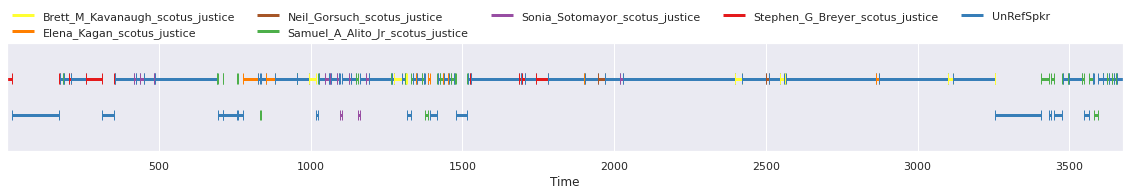

In [3]:
predictions

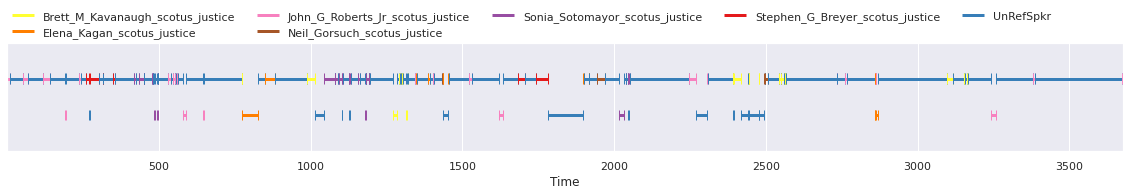

In [4]:
unref_gt

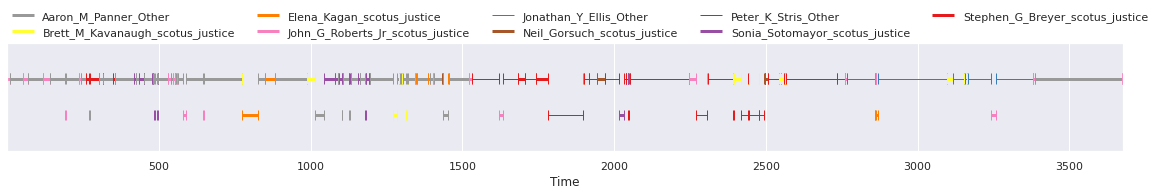

In [5]:
groundtruths

# TSNE


### rate=1 (min)

In [6]:
pt = 'r1/'
X = np.load(pt+'X.npy')
Y = np.load(pt+'Y.npy')

y_scotus = []
for i in Y:
    y_scotus.append(list(spkr_dict.keys())[list(spkr_dict.values()).index(i)])
      
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200, random_state=seed)
tsne_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
labels_tsne_scale = Y
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7479 samples in 0.237s...
[t-SNE] Computed neighbors for 7479 samples in 24.614s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7479
[t-SNE] Computed conditional probabilities for sample 2000 / 7479
[t-SNE] Computed conditional probabilities for sample 3000 / 7479
[t-SNE] Computed conditional probabilities for sample 4000 / 7479
[t-SNE] Computed conditional probabilities for sample 5000 / 7479
[t-SNE] Computed conditional probabilities for sample 6000 / 7479
[t-SNE] Computed conditional probabilities for sample 7000 / 7479
[t-SNE] Computed conditional probabilities for sample 7479 / 7479
[t-SNE] Mean sigma: 0.190761
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.526726
[t-SNE] KL divergence after 5000 iterations: 1.821471


/home/jtumm13d/anaconda3/envs/audio/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


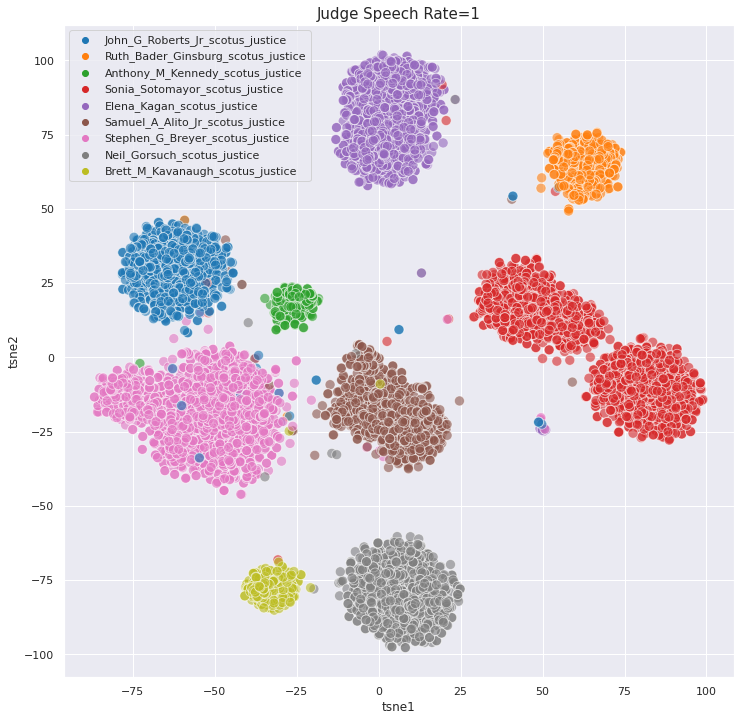

In [7]:
plt.figure(figsize = (12,12))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=y_scotus, palette='tab10', s=100, alpha=0.6).set_title('Judge Speech Rate=1', fontsize=15)
plt.show()

### rate=5 (utilized on test)

In [8]:
pt = 'r5/'
X = np.load(pt+'X.npy')
Y = np.load(pt+'Y.npy')

y_scotus = []
for i in Y:
    y_scotus.append(list(spkr_dict.keys())[list(spkr_dict.values()).index(i)])
      
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200, random_state=seed)
tsne_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
labels_tsne_scale = Y
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 37347 samples in 3.796s...
[t-SNE] Computed neighbors for 37347 samples in 763.335s...
[t-SNE] Computed conditional probabilities for sample 1000 / 37347
[t-SNE] Computed conditional probabilities for sample 2000 / 37347
[t-SNE] Computed conditional probabilities for sample 3000 / 37347
[t-SNE] Computed conditional probabilities for sample 4000 / 37347
[t-SNE] Computed conditional probabilities for sample 5000 / 37347
[t-SNE] Computed conditional probabilities for sample 6000 / 37347
[t-SNE] Computed conditional probabilities for sample 7000 / 37347
[t-SNE] Computed conditional probabilities for sample 8000 / 37347
[t-SNE] Computed conditional probabilities for sample 9000 / 37347
[t-SNE] Computed conditional probabilities for sample 10000 / 37347
[t-SNE] Computed conditional probabilities for sample 11000 / 37347
[t-SNE] Computed conditional probabilities for sample 12000 / 37347
[t-SNE] Computed conditional probabilities for 

/home/jtumm13d/anaconda3/envs/audio/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


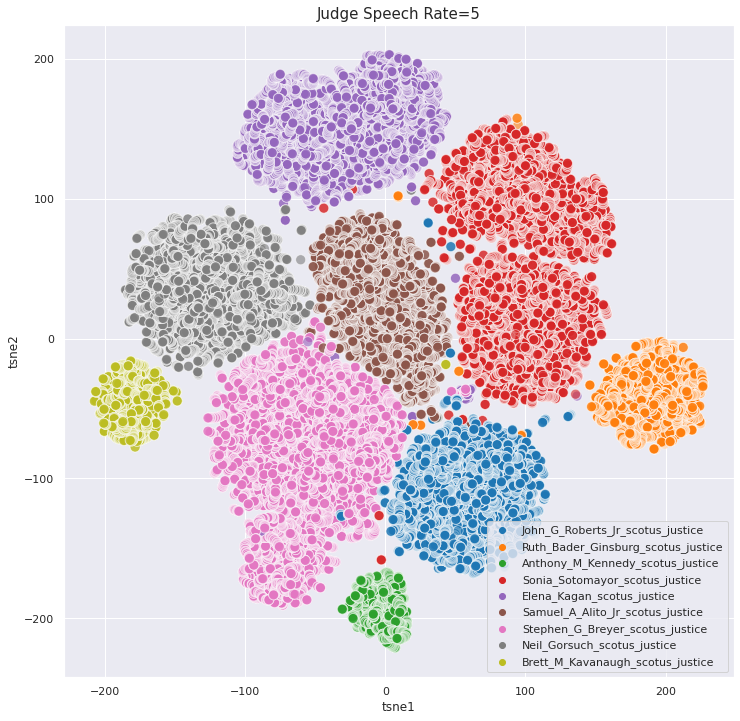

In [9]:
plt.figure(figsize = (12,12))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=y_scotus, palette='tab10', s=100, alpha=0.6).set_title('Judge Speech Rate=5', fontsize=15)
plt.show()